In [13]:
# import csv
# face = 468 # keypoints
# hand = 21 # keypoints
# landmarks = []
# for val in range(1, face + hand*2 +1):
#     landmarks += ['x{}'.format(val), 'y{}'.format(val), 'z{}'.format(val)]
# with open('coords2.csv', mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(landmarks)
# a = ["class_name"]
# with open('class2.csv', mode='w', newline='') as f:
#     csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#     csv_writer.writerow(a)

In [38]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.callbacks import Callback, ModelCheckpoint,EarlyStopping
import pandas as pd 
import numpy as numpy 

In [39]:
weight = pd.read_csv(r'C:\\Users\\Asus\\Desktop\\shuwa\\pj15\\datacollection\\coords.csv')
weight2 = pd.read_csv(r'C:\\Users\\Asus\\Desktop\\shuwa\\pj15\\datacollection\\coords2.csv')
label = pd.read_csv(r"C:\\Users\\Asus\\Desktop\\shuwa\\pj15\\datacollection\\class.csv")
label2 = pd.read_csv(r"C:\\Users\\Asus\\Desktop\\shuwa\\pj15\\datacollection\\class2.csv")

In [40]:
weight = pd.concat([weight,weight2])
label = pd.concat([label,label2])

In [41]:
weight

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z507,x508,y508,z508,x509,y509,z509,x510,y510,z510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002411,0.589465,0.355553,-0.007890,0.628529,0.341654,0.012560,0.632086,0.336100,0.013304
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002196,0.586495,0.352014,-0.007481,0.624999,0.336833,0.012152,0.628583,0.331140,0.012820
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002510,0.586497,0.350037,-0.007743,0.625173,0.333470,0.011331,0.628699,0.327675,0.011929
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002048,0.586049,0.347950,-0.007327,0.625389,0.332000,0.012120,0.628999,0.325952,0.012761
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.002722,0.585101,0.346740,-0.008020,0.624432,0.329431,0.010822,0.628030,0.323350,0.011391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017661,0.690511,0.334727,0.010085,0.733233,0.345192,0.041262,0.738471,0.337776,0.043315
24076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.018222,0.690773,0.335096,0.010884,0.732806,0.347095,0.041357,0.738059,0.339435,0.043442
24077,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.016109,0.690232,0.339451,0.008813,0.733333,0.349467,0.037812,0.738666,0.342047,0.039696
24078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.014803,0.690050,0.348029,0.007387,0.733740,0.358582,0.036869,0.739253,0.350887,0.038733


In [42]:
weight_hand_left = weight.iloc[:,:63]
weight_hand_right = weight.iloc[:,63:126]
weight_face = weight.iloc[:,126:]
weight_hand_right

,x22,y22,z22,x23,y23,z23,x24,y24,z24,x25,...,z39,x40,y40,z40,x41,y41,z41,x42,y42,z42
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24075,0.333538,1.023685,-0.000081,0.372105,0.912273,-0.001714,0.387207,0.824449,-0.005391,0.381112,...,-0.009674,0.307134,0.755611,-0.021702,0.321413,0.781115,-0.022297,0.330666,0.820271,-0.013748
24076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
24078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
label

,class_name
0,BAN
1,BAN
2,BAN
3,BAN
4,BAN
...,...
1500,U
1501,U
1502,U
1503,U


In [44]:
y = label.to_numpy()

def datalabel(weight):
    data = weight.to_numpy()
    
    x = []
    for i in range(0,len(y)):
        a = []
        for j in range(0,16):
            a.append(data[j+16*i])
        x.append(a)
    return np.array(x)

In [45]:
x_hand_right = datalabel(weight_hand_right)
x_hand_left = datalabel(weight_hand_left)
x_face = datalabel(weight_face)
x_face.shape

(2408, 16, 1404)

In [46]:
class_num = label.drop_duplicates()
name = ['class']
with open('ClassName.csv', mode='w', newline='') as f:
    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(name)
    for i in class_num.to_numpy():
        csv_writer.writerow(i)
class_num.to_numpy()
y_label = np.array([np.where(class_num == i)[0][0] for i in y])
y_label

array([0, 0, 0, ..., 7, 7, 7], dtype=int64)

In [47]:
import csv
with open('ClassName.csv',mode='a',newline='') as f:
    csv_writer = csv.writer(f, delimiter=',',quotechar='"',quoting=csv.QUOTE_MINIMAL)
    csv_writer.writerow(class_num)

In [60]:
# x_data = x
def handmodel(hand):
    frame1 = layers.Reshape((-1,1008))(hand)
    frame1 = layers.LSTM(504,kernel_regularizer=tf.keras.regularizers.l1(0.01),
                        activity_regularizer=tf.keras.regularizers.l2(0.01),
                        activation='tanh',return_sequences=True)(frame1)
    frame1 = layers.Dropout(0.4)(frame1)
    frame1 = layers.Dense(50)(frame1)
    return frame1

def facemodel(face):
    frame1 = layers.Reshape((-1,22464))(face)
    frame1 = layers.LSTM(1404,kernel_regularizer=tf.keras.regularizers.l1(0.01),
                        activity_regularizer=tf.keras.regularizers.l2(0.01),
                        activation='tanh',return_sequences=True)(frame1)
    frame1 = layers.Dropout(0.4)(frame1)
    frame1 = layers.Dense(50)(frame1)
    return frame1

In [61]:
def buildmodel():
    left_hand = layers.Input(shape=(16,63))
    right_hand = layers.Input(shape=(16,63))
    face = layers.Input(shape=(16,1404))
    ##Input##
    #Mid Layer##
    ###Face Branch###
    Face = layers.Flatten()(face)
    Face = facemodel(Face)
    ###Right Hand###
    RH = layers.Flatten()(right_hand)
    RH = handmodel(RH)
    ###Left Hand###
    LH = layers.Flatten()(left_hand)
    LH = handmodel(LH)
    ###Combine###
    combined = layers.concatenate([LH,RH,Face])
    shaped = layers.Reshape((-1,150))(combined)
    results = layers.LSTM(150,activation='sigmoid')(shaped)
    results = layers.Dropout(0.1)(results)
    results = layers.Dense(len(class_num),activation='softmax')(results)
    model = models.Model([left_hand, right_hand, face],results)
    return model
model = buildmodel()

model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           [(None, 16, 63)]     0                                            
__________________________________________________________________________________________________
input_44 (InputLayer)           [(None, 16, 63)]     0                                            
__________________________________________________________________________________________________
input_45 (InputLayer)           [(None, 16, 1404)]   0                                            
__________________________________________________________________________________________________
flatten_35 (Flatten)            (None, 1008)         0           input_43[0][0]                   
____________________________________________________________________________________________

In [62]:

model.summary()
# model = models.Sequential([
#     layers.Input(shape=(16,1530)),
#     layers.Flatten(),
#     layers.Reshape((-1,8160)),
#     layers.LayerNormalization( axis=-1),
#     layers.LSTM(1530,kernel_regularizer=tf.keras.regularizers.l1(0.01),
#                      activity_regularizer=tf.keras.regularizers.l2(0.01),
#                      activation='tanh',return_sequences=True),
#     layers.Reshape((-1,1530)),
#     layers.Bidirectional(layers.LSTM(310,activation='sigmoid')),
#     layers.Dropout(0.1),
#     layers.Dense(65,activation='tanh'),
#     layers.Dropout(0.1),
#     layers.Dense(len(class_num),activation='softmax')
# ])
# model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_43 (InputLayer)           [(None, 16, 63)]     0                                            
__________________________________________________________________________________________________
input_44 (InputLayer)           [(None, 16, 63)]     0                                            
__________________________________________________________________________________________________
input_45 (InputLayer)           [(None, 16, 1404)]   0                                            
__________________________________________________________________________________________________
flatten_35 (Flatten)            (None, 1008)         0           input_43[0][0]                   
____________________________________________________________________________________________

In [63]:
from sklearn.model_selection import train_test_split
X_hand_right_train,X_hand_right_test,X_hand_left_train,X_hand_left_test,X_face_train,X_face_test,Y_train,Y_test = train_test_split(x_hand_right,x_hand_left,x_face,y_label,test_size=0.3,random_state=1234)
# print(X_train.shape)

In [66]:
cp_callback = ModelCheckpoint(
    './', verbose=1, save_weights_only=False)
es_callback = EarlyStopping(patience=20, verbose=1)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
checkpoint = ModelCheckpoint('../models/model.h5', monitor='val_acc', verbose=1, mode = 'max', save_best_only=True, save_weights_only=False, period=1)


In [65]:
model.fit(
    [X_hand_left_train,X_hand_right_train,X_face_train],
    Y_train,
    epochs=100,
    batch_size=32,
    validation_data=([X_hand_left_test,X_hand_right_test,X_face_test], Y_test),
    callbacks=[cp_callback,es_callback]
)

Epoch 1/100
21/53 [==========>...................] - ETA: 30s - loss: 3667.7556 - accuracy: 0.1979

KeyboardInterrupt: 

In [35]:
model.save("./model.h5", include_optimizer=False)

In [36]:
from keras.models import load_model
model = load_model("./model.h5")

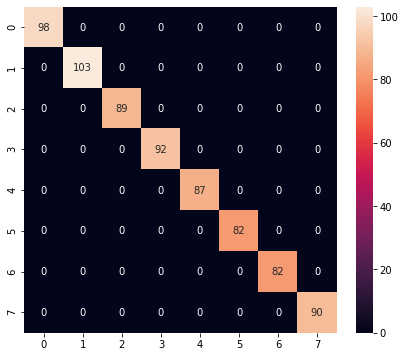

Classification Report


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        # print(classification_report(Y_test, y_pred))

Y_pred = model.predict([X_hand_left_test,X_hand_right_test,X_face_test])
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(Y_test,y_pred)

In [45]:
print X_hand_left_test[0]

array([[6.8374127e-03, 8.9797607e-07, 1.5057989e-04, 3.5754722e-04,
        2.7092455e-02, 7.4781979e-05, 1.6236292e-01, 8.0312341e-01]],
      dtype=float32)

In [20]:
# class_num